In [84]:
import os
import git
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
import ast
import re
import pickle
import matplotlib.pyplot as plt
import git
import pickle

In [3]:
# get the git repo
def get_git_root(path):
	git_repo = git.Repo(path, search_parent_directories=True)
	git_root = git_repo.git.rev_parse("--show-toplevel")
	return git_root

In [18]:
model_dir = os.path.join(get_git_root(os.getcwd()),"models")
input_dir = os.path.join(get_git_root(os.getcwd()),"input")

In [162]:
poly_before = pickle.load(open(os.path.join(model_dir,"poly_users","poly_before.pkl"),"rb"))

In [163]:
len(poly_before)

238

In [164]:
## getting their first juul tweets
juul_first = pd.read_csv(os.path.join(input_dir,"user_first_juul.csv"),index_col=0)
juul_first = juul_first.loc[juul_first.userID.isin(poly_before)]
juul_first_time = list(pd.to_datetime((juul_first["first_juul"])))

In [204]:
## getting their first weed tweet
df_final = pd.read_csv(os.path.join(input_dir,"labelled_data","tweets_predicted.csv"),index_col=0,lineterminator="\n")
## filter the retweets as poly_before is based on filtered ones
df_temp = df_final.loc[df_final['retweetText'].isnull() == True]  # removing the rewteets
df_original = df_temp.loc[~df_temp['tweetText'].str.startswith('RT', na=False)] 



In [205]:
timeline = df_original.loc[df_original.userID.isin(poly_before)]

In [216]:
len(timeline.userID.unique())

158

In [217]:
## weed_pattern
weed_tweets = timeline.loc[timeline.tweetText.str.contains(weed_pattern)] ## got the pattern below

In [218]:
first_weed = list()
for user in poly_before:
    user_tweets = weed_tweets.loc[weed_tweets.userID == user]
    user_tweets = user_tweets.sort_values(by='tweetCreatedAt',ascending=True)
    tweet_first = list(user_tweets["tweetCreatedAt"].head(1))
    if tweet_first:
        first_weed.append([tweet_first[0],user])
    else:
        first_weed.append(['2019-01-01 00:00:00',user])

In [219]:
df_weed_first = pd.DataFrame(first_weed, columns=["time","users"])
df_weed_first["time"] = pd.to_datetime(df_weed_first["time"])
df_weed_first = df_weed_first.sort_values(by="time")

In [222]:
len(df_weed_first.users.unique())

238

In [210]:
## poly before users
print(len(df_weed_first))
print(len(poly_before))
print(len(juul_first))
# so we have the first juul tweet but we dont have the weed tweet

238
238
238


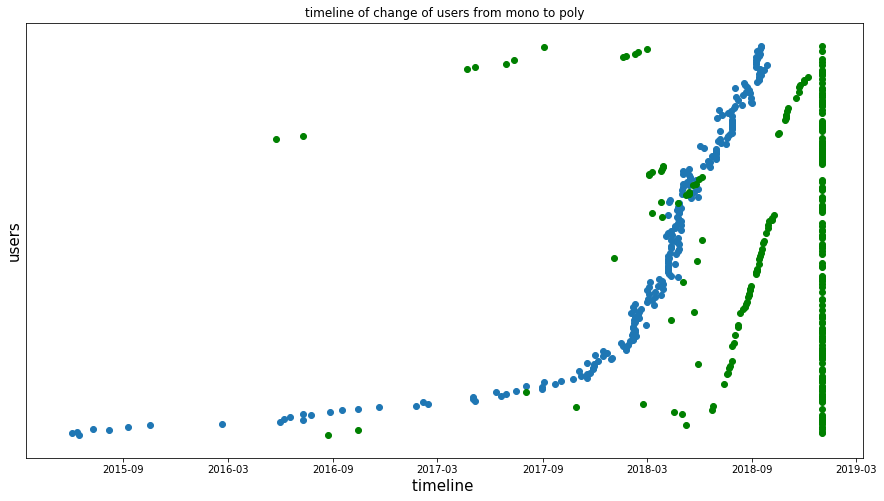

In [223]:
plt.figure(figsize=(15,8))
plt.scatter(list(pd.to_datetime((juul_first["first_juul"]))),[str(users) for users in poly_before])
plt.scatter(list(pd.to_datetime(df_weed_first["time"])), [str(user) for user in list(df_weed_first.users)],color="green")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are of
plt.ylabel("users", fontsize = 15)
plt.xlabel("timeline ", fontsize=15)
plt.title("timeline of change of users from mono to poly" )

plt.show()

In [239]:
temp = (juul_first.loc[juul_first.userID.isin(list(df_weed_first.users))])
for user in poly_before:
    juul_ = pd.to_datetime(list(temp["first_juul"].loc[temp.userID == user]))
    weed_ = list(df_weed_first["time"].loc[df_weed_first.users == user])
    

In [232]:
df_weed_first

,time,users
180,2016-05-25 05:28:53,24200759
182,2016-07-10 15:53:11,3456044893
0,2016-08-22 22:55:07,574043737
3,2016-10-13 22:26:49,3031192491
223,2017-04-21 16:15:00,180589307
224,2017-05-05 21:02:48,54236937
226,2017-06-28 15:06:58,4163564352
228,2017-07-12 21:55:13,2265692381
26,2017-08-02 17:32:35,316331833
236,2017-09-02 12:37:41,3126547479


## Dump the weed Pattern in model dir

In [192]:
## getting weed pattern
weed_words = pickle.load(open(os.path.join(model_dir,"weed_words.pkl"),"rb"))

In [193]:
weed_words = [(" " + word +" ") for word in weed_words]
weed_pattern = "|".join(weed_words)
weed_pattern

' weed | ganja | marijuana | grass | cannabis | pot | smoke | mary jane | hemp | marihuana | hash | reefer | hashish | herb | bhang | green goddess | locoweed | maryjane | bud | spliff | wacky baccy | joint | sinsemilla | doobie | tobacco | acapulco gold '